In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from datetime import datetime, timedelta
from pandas import DataFrame
import xgboost as xgb
from xgboost import XGBRegressor

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

hoilday_data = pd.read_csv("./hkholiday.csv")
weather_data = pd.read_csv("./hkweather.csv")

In [2]:
train_data.head()

,id,date,speed
0,0,1/1/2017 0:00,43.002930
1,1,1/1/2017 1:00,46.118696
2,2,1/1/2017 2:00,44.294158
3,3,1/1/2017 3:00,41.067468
4,4,1/1/2017 4:00,46.448653


In [3]:
train_data['Day'], train_data['Time'] = train_data['date'].str.split(' ', 1).str
test_data['Day'], test_data['Time'] = test_data['date'].str.split(' ', 1).str

C:\Users\poonb\Anaconda3\envs\MSBD5001\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
C:\Users\poonb\Anaconda3\envs\MSBD5001\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [4]:
train_data['date'] = pd.to_datetime(train_data['date'], format="%d/%m/%Y %H:%M")
train_data['Day'] = pd.to_datetime(train_data['Day'], format="%d/%m/%Y")
train_data['Time'] = pd.to_datetime(train_data['Time'], format="%H:%M")
#train_data['Time'] = train_data['Time'].dt.time
test_data['date'] = pd.to_datetime(test_data['date'], format="%d/%m/%Y %H:%M")
test_data['Day'] = pd.to_datetime(test_data['Day'], format="%d/%m/%Y")
test_data['Time'] = pd.to_datetime(test_data['Time'], format="%H:%M")
#test_data['Time'] = test_data['Time'].dt.time
weather_data['Day'] = pd.to_datetime(weather_data['Day'], format="%d/%m/%Y")
hoilday_data['Day'] = pd.to_datetime(hoilday_data['Day'], format="%d/%m/%Y")

In [5]:
hoilday_data['Hoilday'] = hoilday_data['Hoilday'].astype('bool')

In [6]:
train_data['day_of_week'] = train_data['date'].dt.day_name()
test_data['day_of_week'] = test_data['date'].dt.day_name()
train_data= train_data.drop(['date'], axis = 1)
test_data= test_data.drop(['date'], axis = 1)
train_data.head(35)

,id,speed,Day,Time,day_of_week
0,0,43.002930,2017-01-01,1900-01-01 00:00:00,Sunday
1,1,46.118696,2017-01-01,1900-01-01 01:00:00,Sunday
2,2,44.294158,2017-01-01,1900-01-01 02:00:00,Sunday
3,3,41.067468,2017-01-01,1900-01-01 03:00:00,Sunday
4,4,46.448653,2017-01-01,1900-01-01 04:00:00,Sunday
5,5,46.797766,2017-01-01,1900-01-01 05:00:00,Sunday
6,6,44.404925,2017-01-01,1900-01-01 06:00:00,Sunday
7,7,45.255897,2017-01-01,1900-01-01 07:00:00,Sunday
8,8,45.680859,2017-01-01,1900-01-01 08:00:00,Sunday
9,9,48.435676,2017-01-01,1900-01-01 09:00:00,Sunday


In [7]:
test_data.head()

,id,Day,Time,day_of_week
0,0,2018-01-01,1900-01-01 02:00:00,Monday
1,1,2018-01-01,1900-01-01 05:00:00,Monday
2,2,2018-01-01,1900-01-01 07:00:00,Monday
3,3,2018-01-01,1900-01-01 08:00:00,Monday
4,4,2018-01-01,1900-01-01 10:00:00,Monday


In [8]:
weather_data['Total Rainfall'] = weather_data['Total Rainfall'].replace('Trace', 0)
weather_data['Total Rainfall'] = weather_data['Total Rainfall'].astype('float64')
weather_data['Mean Wind Speed'] = weather_data['Mean Wind Speed'].replace('***', 0)
weather_data['Mean Wind Speed'] = weather_data['Mean Wind Speed'].astype('float64')
weather_data['Prevailing Wind Direction'] = weather_data['Prevailing Wind Direction'].replace('***', 0)
weather_data['Prevailing Wind Direction'] = weather_data['Prevailing Wind Direction'].astype('float64')

In [9]:
combine_train_data=pd.merge(train_data, hoilday_data, left_on='Day', right_on='Day', how='left')
combine_train_data['Hoilday'] = combine_train_data['Hoilday'].replace(np.nan, False)
combine_train_data.loc[combine_train_data.day_of_week == 'Sunday', 'Hoilday'] = True
combine_train_data=pd.merge(combine_train_data, weather_data, left_on='Day', right_on='Day', how='left')

In [10]:
combine_train_data.head()

,id,speed,Day,Time,day_of_week,Hoilday,Mean Pressure,Absolute Daily Max Tempurature,Mean Tempurature,Absolute Daily Min Tempurature,Mean Dew Point,Mean Relative Humidity,Mean Amount of Cloud,Total Rainfall,Total Bright Sunshine,Prevailing Wind Direction,Mean Wind Speed
0,0,43.002930,2017-01-01,1900-01-01 00:00:00,Sunday,True,1021.7,20.8,19.2,18.4,15.6,80,72,0.0,4.6,60.0,34.2
1,1,46.118696,2017-01-01,1900-01-01 01:00:00,Sunday,True,1021.7,20.8,19.2,18.4,15.6,80,72,0.0,4.6,60.0,34.2
2,2,44.294158,2017-01-01,1900-01-01 02:00:00,Sunday,True,1021.7,20.8,19.2,18.4,15.6,80,72,0.0,4.6,60.0,34.2
3,3,41.067468,2017-01-01,1900-01-01 03:00:00,Sunday,True,1021.7,20.8,19.2,18.4,15.6,80,72,0.0,4.6,60.0,34.2
4,4,46.448653,2017-01-01,1900-01-01 04:00:00,Sunday,True,1021.7,20.8,19.2,18.4,15.6,80,72,0.0,4.6,60.0,34.2


In [11]:
combine_test_data=pd.merge(test_data, hoilday_data, left_on='Day', right_on='Day', how='left')
combine_test_data['Hoilday'] = combine_test_data['Hoilday'].replace(np.nan, False)
combine_test_data.loc[combine_test_data.day_of_week == 'Sunday', 'Hoilday'] = True
combine_test_data=pd.merge(combine_test_data, weather_data, left_on='Day', right_on='Day', how='left')

In [12]:
combine_test_data.head(60)

,id,Day,Time,day_of_week,Hoilday,Mean Pressure,Absolute Daily Max Tempurature,Mean Tempurature,Absolute Daily Min Tempurature,Mean Dew Point,Mean Relative Humidity,Mean Amount of Cloud,Total Rainfall,Total Bright Sunshine,Prevailing Wind Direction,Mean Wind Speed
0,0,2018-01-01,1900-01-01 02:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
1,1,2018-01-01,1900-01-01 05:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
2,2,2018-01-01,1900-01-01 07:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
3,3,2018-01-01,1900-01-01 08:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
4,4,2018-01-01,1900-01-01 10:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
5,5,2018-01-01,1900-01-01 16:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
6,6,2018-01-01,1900-01-01 18:00:00,Monday,True,1020.5,19.0,17.3,16.3,13.3,78,75,0.0,3.0,70.0,28.3
7,7,2018-01-02,1900-01-01 01:00:00,Tuesday,False,1019.3,19.2,17.8,16.0,13.9,78,77,0.0,3.6,60.0,31.7
8,8,2018-01-02,1900-01-01 02:00:00,Tuesday,False,1019.3,19.2,17.8,16.0,13.9,78,77,0.0,3.6,60.0,31.7
9,9,2018-01-02,1900-01-01 07:00:00,Tuesday,False,1019.3,19.2,17.8,16.0,13.9,78,77,0.0,3.6,60.0,31.7


In [13]:
new_combine_train_data= combine_train_data.drop(['id'],axis = 1)

In [14]:
NOW_day = new_combine_train_data['Day'][0]
new_combine_train_data['Day'] =  (combine_train_data['Day']- NOW_day).astype('timedelta64[D]')
new_combine_train_data['Day']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
14001    729.0
14002    729.0
14003    729.0
14004    729.0
14005    729.0
Name: Day, Length: 14006, dtype: float64

In [15]:
NOW_time = new_combine_train_data['Time'][0]
new_combine_train_data['Time'] =  (combine_train_data['Time']- NOW_time).astype('timedelta64[h]')
new_combine_train_data['Time']

0         0.0
1         1.0
2         2.0
3         3.0
4         4.0
         ... 
14001    12.0
14002    15.0
14003    16.0
14004    18.0
14005    20.0
Name: Time, Length: 14006, dtype: float64

In [16]:
new_combine_train_data['Timex']=np.sin(2.*np.pi*new_combine_train_data.Time/24)

new_combine_train_data['Timey']=np.cos(2.*np.pi*new_combine_train_data.Time/24)

In [17]:
combine_test_data['Day'] = (combine_test_data['Day'] - NOW_day).astype('timedelta64[D]')
combine_test_data['Day']

0       365.0
1       365.0
2       365.0
3       365.0
4       365.0
        ...  
3499    729.0
3500    729.0
3501    729.0
3502    729.0
3503    729.0
Name: Day, Length: 3504, dtype: float64

In [18]:
combine_test_data['Time'] =  (combine_test_data['Time']- NOW_time).astype('timedelta64[h]')
combine_test_data['Time']

0        2.0
1        5.0
2        7.0
3        8.0
4       10.0
        ... 
3499    17.0
3500    19.0
3501    21.0
3502    22.0
3503    23.0
Name: Time, Length: 3504, dtype: float64

In [19]:
combine_test_data['Timex']=np.sin(2.*np.pi*combine_test_data.Time/24)

combine_test_data['Timey']=np.cos(2.*np.pi*combine_test_data.Time/24)

In [20]:
new_combine_train_data = pd.get_dummies(new_combine_train_data, prefix=['day_of_week'], drop_first=True)
combine_test_data = pd.get_dummies(combine_test_data, prefix=['day_of_week'], drop_first=True)

In [21]:
x_train  = new_combine_train_data.drop(['speed'],axis = 1)
y_train = new_combine_train_data['speed']
x_test = combine_test_data.drop(['id'],axis = 1)
print(x_train.shape)
print(y_train.shape)

(14006, 22)
(14006,)


In [22]:
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=1000, silent=True, objective='reg:gamma')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [23]:
print("Training Score:%f"%model.score(x_train,y_train))

Training Score:0.976416


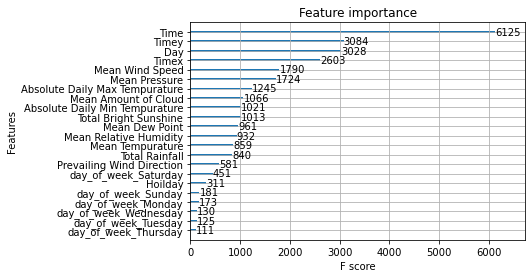

In [24]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [25]:
y_pred = model.predict(x_test)
len(y_pred) 

3504

In [26]:
submission = pd.DataFrame({
        'id': test_data['id'],
        "speed": y_pred
    })

In [27]:
submission.describe()

,id,speed
count,3504.000000,3504.000000
mean,1751.500000,32.714520
std,1011.661999,13.311082
min,0.000000,6.424197
25%,875.750000,19.470295
50%,1751.500000,36.274343
75%,2627.250000,46.080668
max,3503.000000,57.670246


In [28]:
submission

,id,speed
0,0,48.064659
1,1,47.807304
2,2,40.312111
3,3,35.972290
4,4,41.292160
...,...,...
3499,3499,13.816026
3500,3500,23.104513
3501,3501,50.288532
3502,3502,41.102806


In [29]:
submission.to_csv('submission.csv',index=False)